In [2]:
# Import necessary items and dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [3]:
# Read in data
whale_returns = Path('whale_returns.csv')
sp500_historical_returns = Path('sp500_history.csv')
goog_historical_returns = Path('goog_historical.csv')
cost_historical_returns = Path('cost_historical.csv')
algo_returns = Path('algo_returns.csv')
aapl_historical_returns = Path('aapl_historical.csv')

In [4]:
# Read Whale Returns To Pandas Dataframe
whale_dataframe = pd.read_csv(whale_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls in Whale dataframe
whale_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls in Whale dataframe
whale_dataframe.dropna(inplace=True)

In [7]:
whale_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

### Algorithmic Daily Returns

In [8]:
# Read algorithmic returns
algo_dataframe = pd.read_csv(algo_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls in algo dataframe
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls in algo dataframe
algo_dataframe = algo_dataframe.dropna()
algo_dataframe

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


### S&P 500 Returns

In [11]:
# Read in S&P 500 Closing Prices
sp500_dataframe = pd.read_csv(sp500_historical_returns,index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_sorted_dataframe = sp500_dataframe.sort_index(ascending=True)
sp500_sorted_dataframe.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Check Data Types in S&P 500 Returns
sp500_sorted_dataframe.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types in S&P 500 Returns
# Remove Dollar Signs
sp500_sorted_dataframe['Close'] = sp500_sorted_dataframe['Close'].str.replace('$', '')

# Make Close a float and not an object
sp500_sorted_dataframe['Close'] = sp500_sorted_dataframe['Close'].astype('float')

# Check data types
sp500_sorted_dataframe.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns of S&P 500
sp500_daily_returns = sp500_sorted_dataframe.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls from S&P 500 Data
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename 'Close' column to 'S&P 500'
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close": "S&P 500"})
sp500_daily_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


### Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame
concat_dataframe = pd.concat([whale_dataframe, algo_dataframe, sp500_daily_returns], axis='columns', join='inner')
concat_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [18]:
# Check for null or NA values
concat_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

In [46]:
# Write portfolio to CSV for use in portion of assignment requiring personal selection of portfolio elements
csv_output = concat_dataframe.to_csv('whale_portfolio.csv', index = True)

## Portfolio Analysis

### Performance

<AxesSubplot:xlabel='Date'>

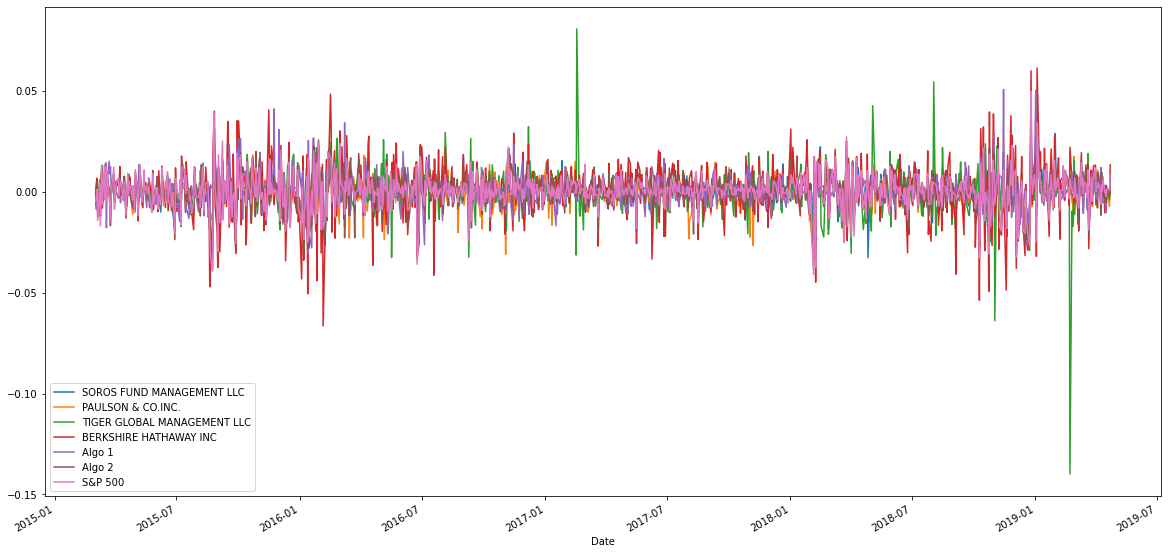

In [19]:
# Plot daily returns
concat_dataframe.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

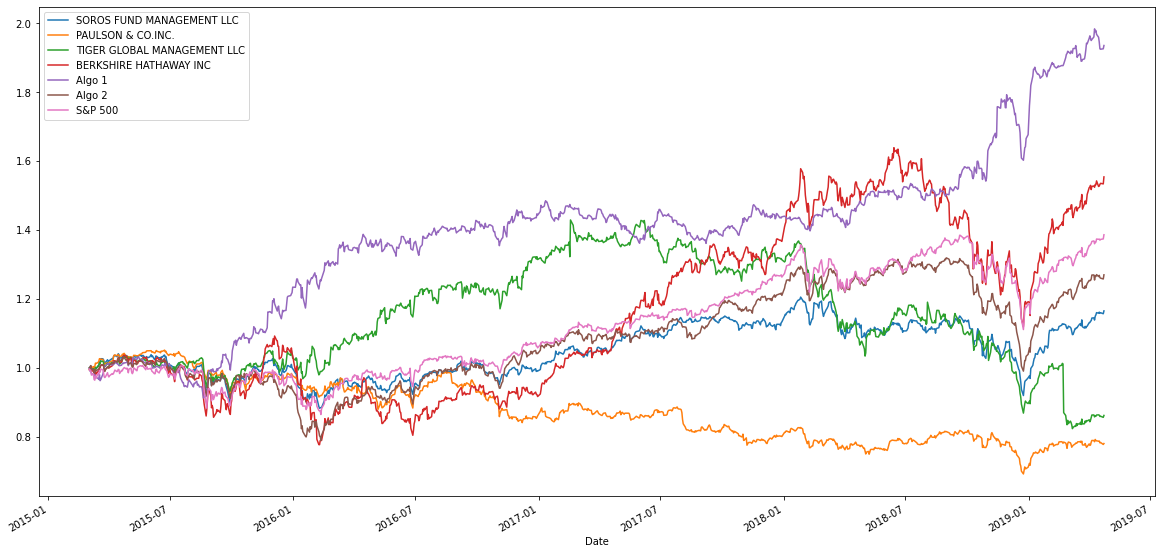

In [20]:
# Plot cumulative returns
cumulative_returns = (1 + concat_dataframe).cumprod()
cumulative_returns.plot(figsize=(20,10))

### Risk

<AxesSubplot:>

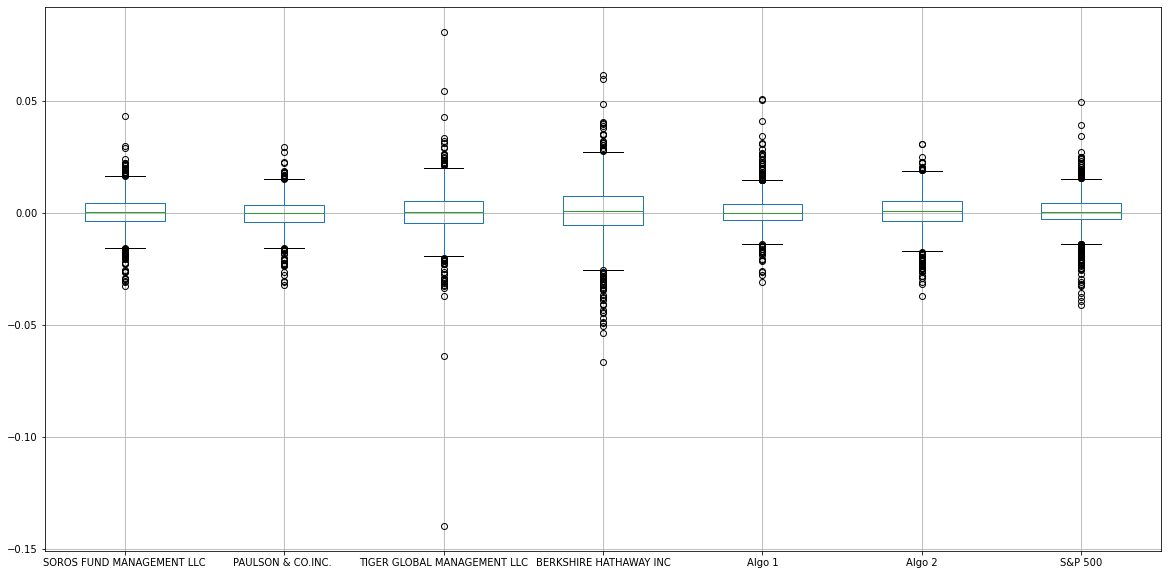

In [21]:
# Box plot to visually show risk
concat_dataframe.boxplot(figsize=(20,10))

In [22]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
standard_deviation = concat_dataframe.std()
standard_deviation

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Which Portfolios are riskier than the S&P 500
**Tiger Global Management LLC** and **Berkshire Hathaway Inc** have greater deviation than the S&P 500. Therefore they have higher risk.

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation = standard_deviation * np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

### Rolling Statistics

<AxesSubplot:xlabel='Date'>

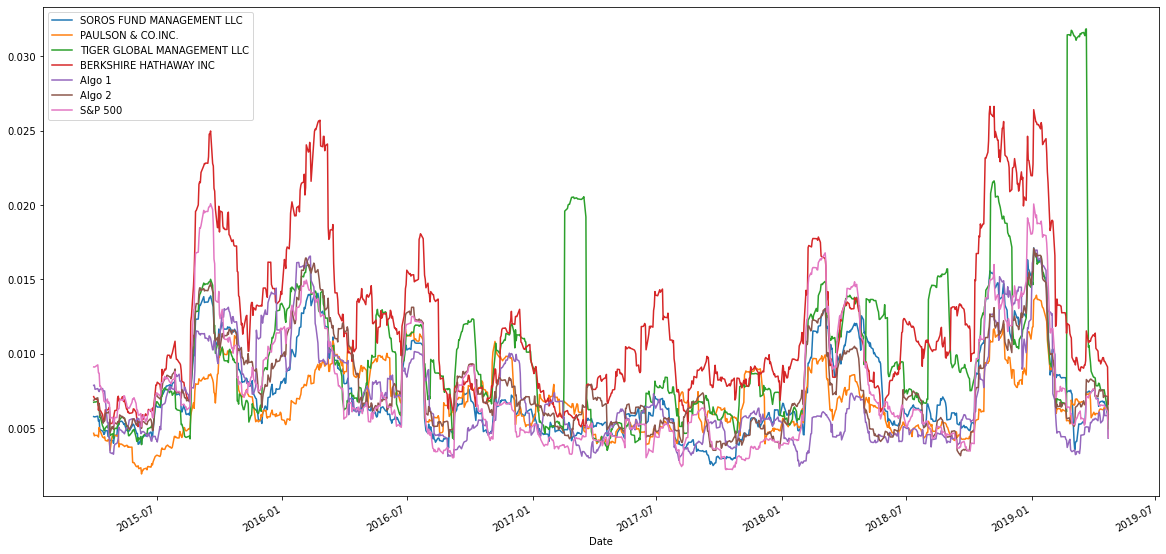

In [25]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
concat_dataframe.rolling(window=21).std().plot(figsize=(20,10))

In [26]:
# Construct a correlation table
portfolio_correlation = concat_dataframe.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [29]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
combined_daily_returns = concat_dataframe
combined_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [35]:
# Calculate covariance of all daily returns of TIGER GLOBAL MANAGEMENT LLC vs. SP 500
tiger_covariance = combined_daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(combined_daily_returns['S&P 500'])
tiger_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000039
2019-04-17    0.000037
2019-04-18    0.000032
2019-04-22    0.000033
2019-04-23    0.000032
Length: 1043, dtype: float64

In [36]:
# Calculate variance of all daily returns of TIGER GLOBAL MANAGEMENT LLC vs. S&P 500
rolling_variance = combined_daily_returns['S&P 500'].rolling(window=30).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000043
2019-04-17    0.000041
2019-04-18    0.000038
2019-04-22    0.000037
2019-04-23    0.000033
Name: S&P 500, Length: 1043, dtype: float64

In [37]:
# Beta = covariance / variance
rolling_tiger_beta = tiger_covariance / rolling_variance
rolling_tiger_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.903993
2019-04-17    0.899050
2019-04-18    0.848975
2019-04-22    0.876991
2019-04-23    0.964931
Length: 1043, dtype: float64

<AxesSubplot:title={'center':'Rolling 30-Day Beta of TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

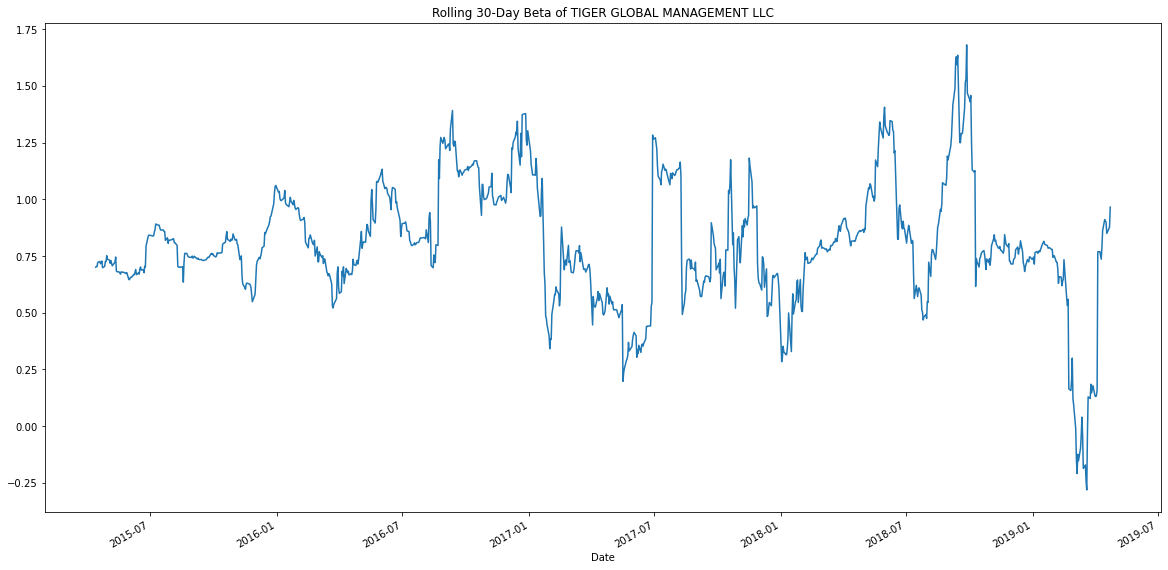

In [38]:
rolling_tiger_beta.plot(figsize=(20,10), title='Rolling 30-Day Beta of TIGER GLOBAL MANAGEMENT LLC')

In [42]:
# Calculate a rolling window using the exponentially weighted moving average. 
exponentially_weighted_moving_average = combined_daily_returns.ewm(span=30, adjust=False).mean()
exponentially_weighted_moving_average

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,-0.001040,-0.004450,-0.000627,-0.005873,-0.002371,-0.000732,-0.004529
2015-03-05,-0.000714,-0.003900,-0.000435,-0.005060,-0.002280,-0.000406,-0.004160
2015-03-06,-0.001178,-0.003879,-0.000954,-0.005579,-0.002452,-0.001119,-0.004806
2015-03-09,-0.001064,-0.003356,-0.000515,-0.005325,-0.002646,-0.000963,-0.004241
...,...,...,...,...,...,...,...
2019-04-16,0.001816,0.000509,0.000183,0.001580,0.000389,0.001374,0.001532
2019-04-17,0.001512,0.000059,-0.000113,0.001686,-0.000301,0.000948,0.001286
2019-04-18,0.001508,0.000134,-0.000068,0.001700,-0.000320,0.000807,0.001305


<AxesSubplot:title={'center':'WEIGHTED MOVING AVERAGE'}, xlabel='Date'>

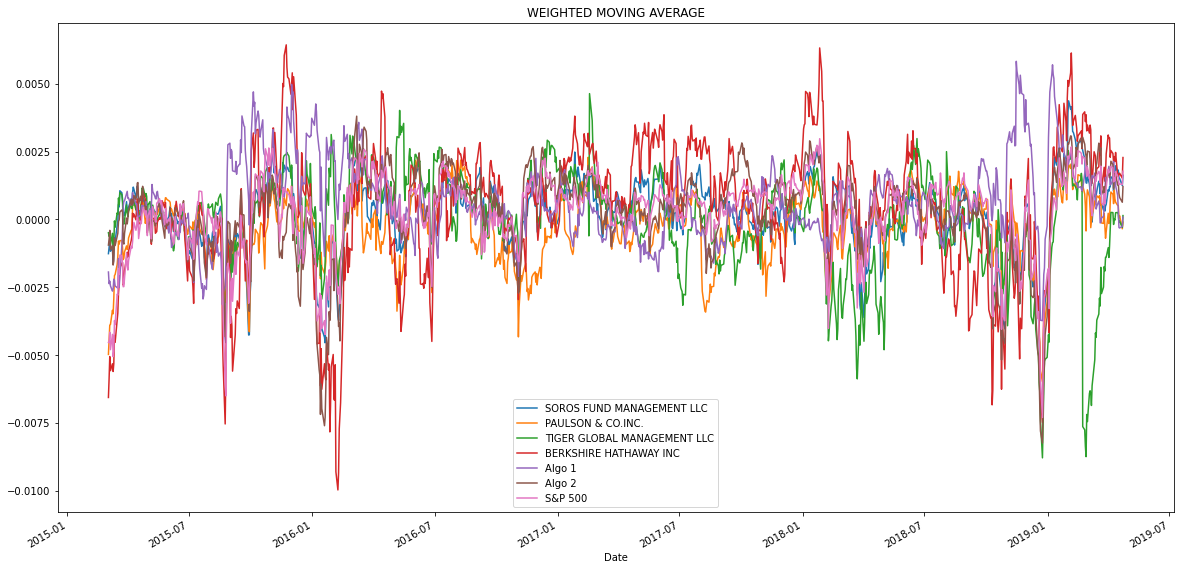

In [43]:
exponentially_weighted_moving_average.plot(figsize=(20,10), title='WEIGHTED MOVING AVERAGE')

In [44]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (combined_daily_returns.mean() * 252 / (combined_daily_returns.std() * np.sqrt(252)))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'SHARPE RATIOS'}>

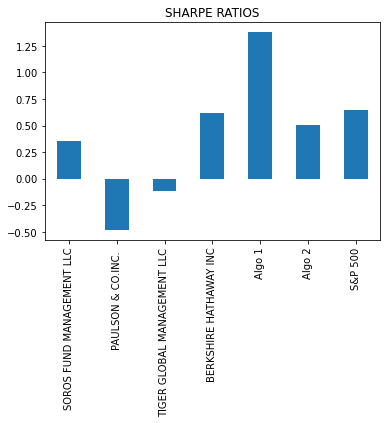

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='SHARPE RATIOS')